In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.compose import ColumnTransformer
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
from sklearn.manifold import Isomap, TSNE, MDS
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import random
import warnings 
import pickle
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv('genres_v2.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [3]:
df2=pd.read_csv('audio_features.csv')
df2.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.634,0.862,2,-5.337,1,0.0376,0.0287,0.000000,0.0217,0.767,95.989,audio_features,1zWZvrk13cL8Sl3VLeG57F,spotify:track:1zWZvrk13cL8Sl3VLeG57F,https://api.spotify.com/v1/tracks/1zWZvrk13cL8...,https://api.spotify.com/v1/audio-analysis/1zWZ...,227693,4
1,0.595,0.389,2,-9.245,1,0.0349,0.4180,0.000001,0.1160,0.400,166.052,audio_features,5kNe7PE09d6Kvw5pAsx23n,spotify:track:5kNe7PE09d6Kvw5pAsx23n,https://api.spotify.com/v1/tracks/5kNe7PE09d6K...,https://api.spotify.com/v1/audio-analysis/5kNe...,227427,4
2,0.543,0.837,11,-6.448,1,0.0608,0.1170,0.000000,0.0872,0.506,168.056,audio_features,6GsAD8PgHxmEuIPTG8GP3M,spotify:track:6GsAD8PgHxmEuIPTG8GP3M,https://api.spotify.com/v1/tracks/6GsAD8PgHxmE...,https://api.spotify.com/v1/audio-analysis/6GsA...,186080,4
3,0.688,0.702,7,-4.792,0,0.0499,0.0215,0.000000,0.1280,0.740,94.006,audio_features,6Knv6wdA0luoMUuuoYi2i1,spotify:track:6Knv6wdA0luoMUuuoYi2i1,https://api.spotify.com/v1/tracks/6Knv6wdA0luo...,https://api.spotify.com/v1/audio-analysis/6Knv...,192191,4
4,0.457,0.948,10,-3.364,1,0.0354,0.0191,0.000000,0.0536,0.878,148.000,audio_features,0i5el041vd6nxrGEU8QRxy,spotify:track:0i5el041vd6nxrGEU8QRxy,https://api.spotify.com/v1/tracks/0i5el041vd6n...,https://api.spotify.com/v1/audio-analysis/0i5e...,208960,4


In [4]:
df2=df2.drop(['type','id','uri','track_href','analysis_url'],axis=1)


In [4]:

tempX=df2.iloc[:,:11]
tempX.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.634,0.862,2,-5.337,1,0.0376,0.0287,0.000000,0.0217,0.767,95.989
1,0.595,0.389,2,-9.245,1,0.0349,0.4180,0.000001,0.1160,0.400,166.052
2,0.543,0.837,11,-6.448,1,0.0608,0.1170,0.000000,0.0872,0.506,168.056
3,0.688,0.702,7,-4.792,0,0.0499,0.0215,0.000000,0.1280,0.740,94.006
4,0.457,0.948,10,-3.364,1,0.0354,0.0191,0.000000,0.0536,0.878,148.000


In [5]:
data=df.drop(["type","type","id","uri","track_href","analysis_url","song_name",
                "Unnamed: 0","title", "duration_ms", "time_signature"], axis =1)

data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,hardstyle
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,hardstyle
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,hardstyle


In [6]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x, y)
plot_tsne = plt.scatter(x_tsne[:,0], x_tsne[:,1], c=np.unique(y))
handles, labels = plot_tsne.legend_elements()
lg = plt.legend(handles, list(np.unique(y)), loc = 'center right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel("T-SNE 1")
plt.ylabel("T-SNE 2")
_ = plt.title("T-SNE")

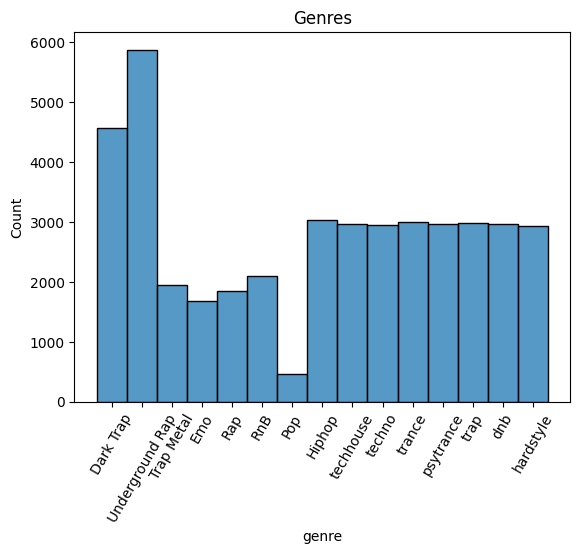

In [7]:
ax = sns.histplot(data["genre"])
_ = plt.xticks(rotation=60)
_ = plt.title("Genres")

In [8]:
dataCopy=data.copy()
data = data.replace("Trap Metal", "Rap")
data = data.replace("Underground Rap", "Rap")
data = data.replace("Emo", "Rap")
data = data.replace("RnB", "Rap")
data = data.replace("Hiphop", "Rap")
data = data.replace("Dark Trap", "Rap")

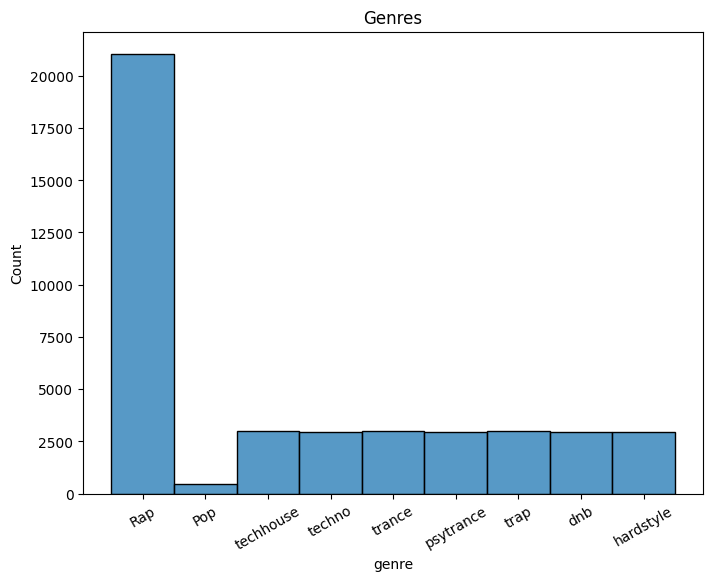

In [9]:
plt.subplots(figsize=(8,6))
ax = sns.histplot(data["genre"])
_ = plt.xticks(rotation=30)
_ = plt.title('Genres')

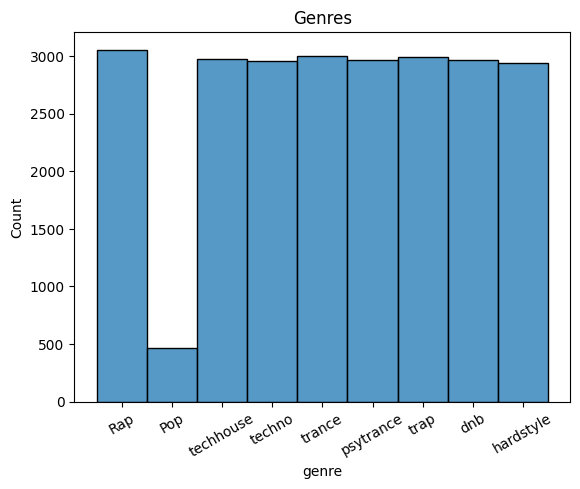

In [10]:
rows_drop = [] 

for i in range(len(data)): 
  if data.iloc[i]['genre'] == 'Rap': 
    if random.random()<0.85: 
      rows_drop.append(i) 
data.drop(index = rows_drop, inplace=True) 

ax = sns.histplot(data["genre"]) 
_ = plt.xticks(rotation=30) 
_ = plt.title("Genres")

In [11]:
x = data.loc[:,:"tempo"]
y = data["genre"]

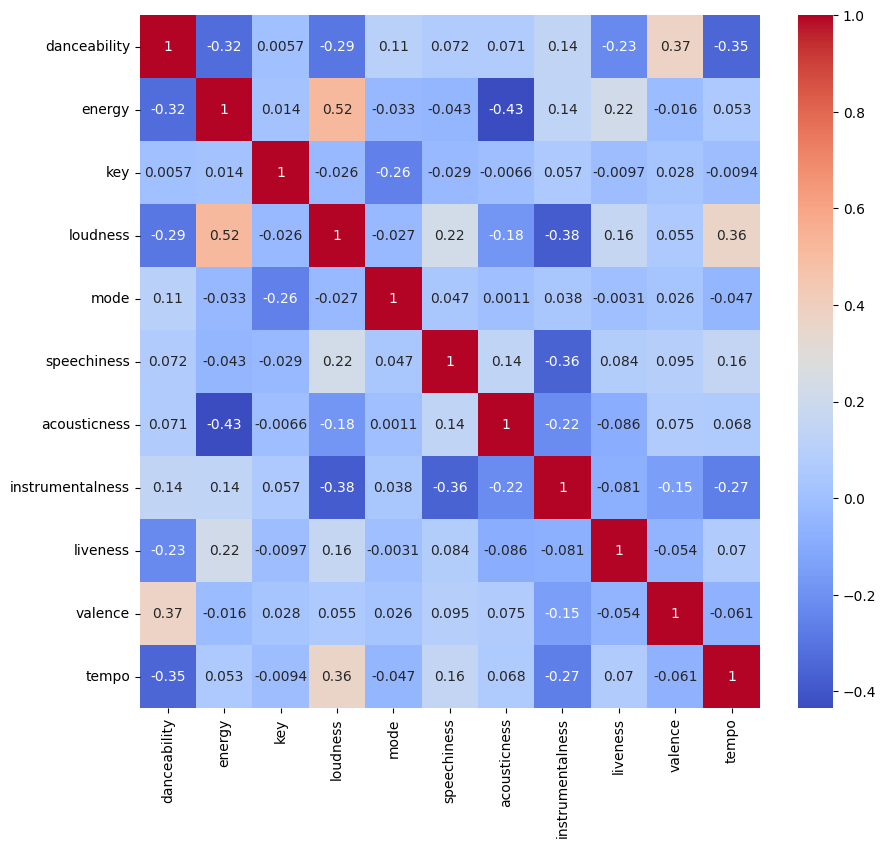

In [12]:
plt.subplots(figsize=(10,9))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.show()

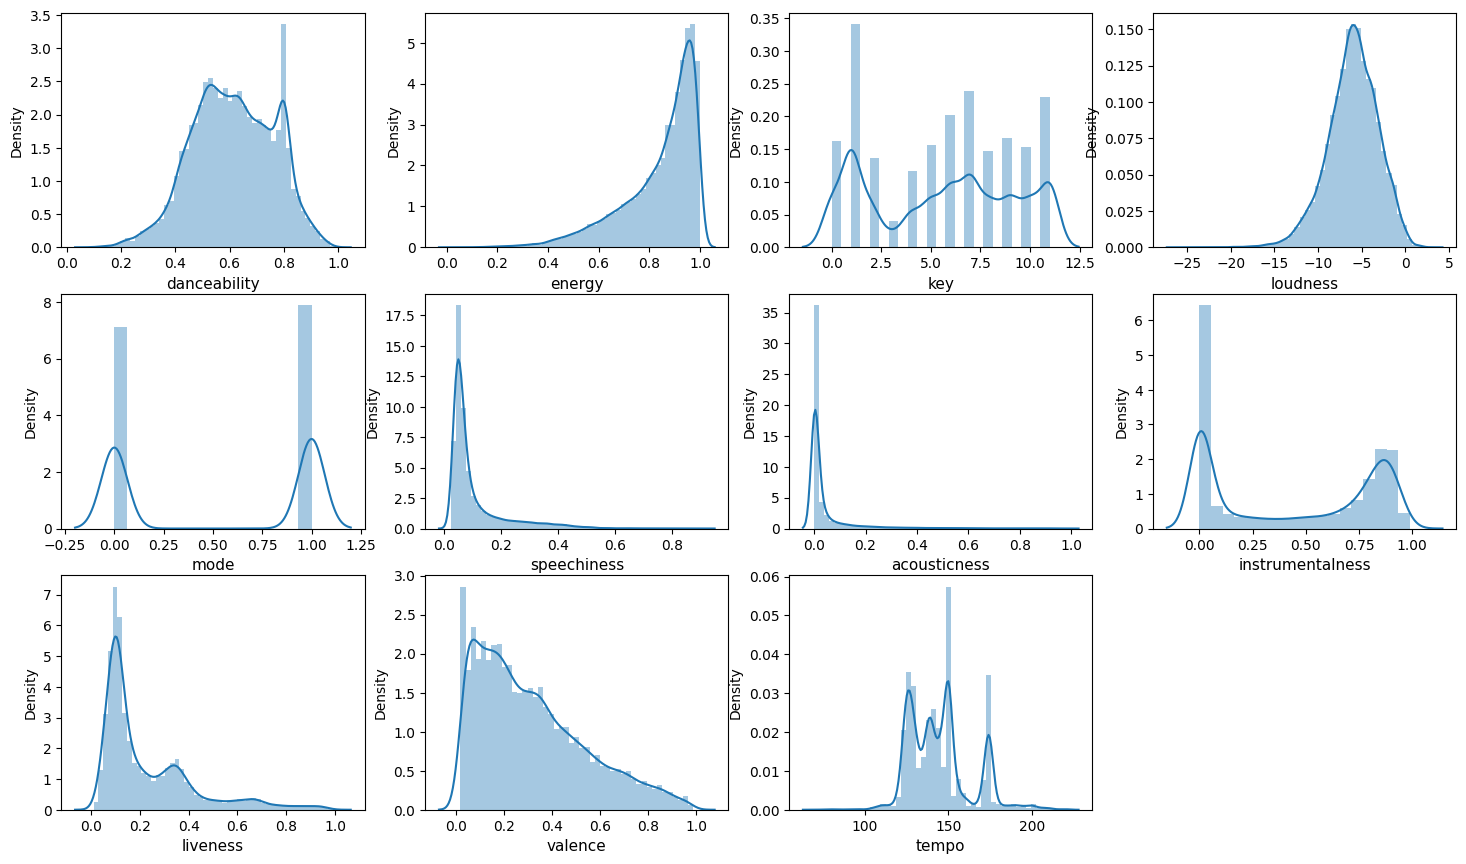

In [13]:
k=0
plt.figure(figsize = (18,14))
for i in x.columns:
    plt.subplot(4,4, k + 1)
    sns.distplot(x[i])
    plt.xlabel(i, fontsize=11)
    k +=1

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
test_size= 0.2, random_state=42,shuffle=True )

In [15]:
col = xtrain.columns
scalerx = MinMaxScaler()
xtrain = scalerx.fit_transform(xtrain)
xtest = scalerx.transform(xtest)
xtrain = pd.DataFrame(xtrain, columns = col)
xtest = pd.DataFrame(xtest, columns = col)

In [16]:
le = preprocessing.LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

In [17]:
pickle.dump(scalerx,open('scaler.pkl','wb'))
pickle.dump(le,open('encoder.pkl','wb'))

In [18]:
def train_model(model,params={}):
  grid=GridSearchCV(model,param_grid=params,n_jobs=-1,refit=True,cv=3,verbose=1)
  grid.fit(xtrain,ytrain)
  return grid

def report(model):
  print(model.best_params_)
  preds=model.predict(xtest)
  cm=metrics.confusion_matrix(ytest,preds)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
  cm_display.plot()
  plt.show()
  print(metrics.classification_report(ytest,preds))
  print('training accuracy:',model.best_score_)
  print('testing accuracy:',metrics.accuracy_score(ytest,preds))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


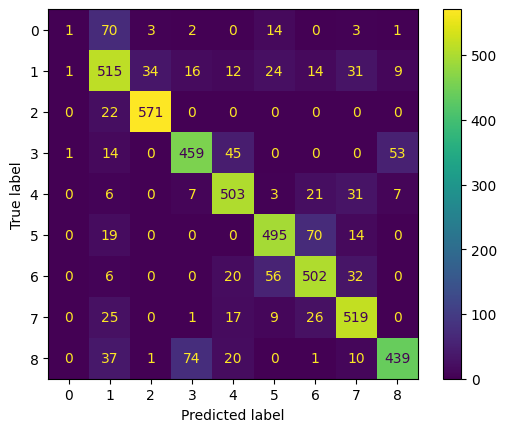

0.8050041734696145
              precision    recall  f1-score   support

           0       0.33      0.01      0.02        94
           1       0.72      0.79      0.75       656
           2       0.94      0.96      0.95       593
           3       0.82      0.80      0.81       572
           4       0.82      0.87      0.84       578
           5       0.82      0.83      0.83       598
           6       0.79      0.81      0.80       616
           7       0.81      0.87      0.84       597
           8       0.86      0.75      0.80       582

    accuracy                           0.82      4886
   macro avg       0.77      0.74      0.74      4886
weighted avg       0.81      0.82      0.81      4886

0.8194842406876791


In [42]:

from sklearn.svm import SVC

svc=train_model(SVC(random_state=0),{})
report(svc)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
{'n_neighbors': 7}


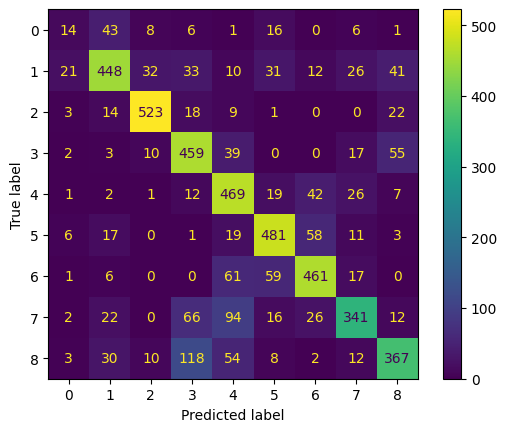

              precision    recall  f1-score   support

           0       0.26      0.15      0.19        95
           1       0.77      0.69      0.72       654
           2       0.90      0.89      0.89       590
           3       0.64      0.78      0.71       585
           4       0.62      0.81      0.70       579
           5       0.76      0.81      0.78       596
           6       0.77      0.76      0.76       605
           7       0.75      0.59      0.66       579
           8       0.72      0.61      0.66       604

    accuracy                           0.73      4887
   macro avg       0.69      0.68      0.68      4887
weighted avg       0.73      0.73      0.73      4887

training accuracy: 0.7078473501125435
testing accuracy: 0.7290771434417843


In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn=train_model(KNeighborsClassifier(),{'n_neighbors':[3,5,7]})
report(knn)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


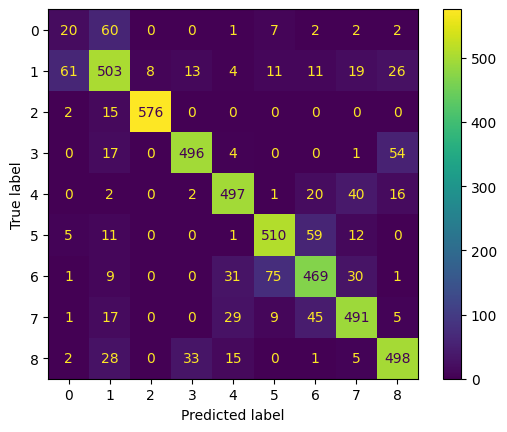

              precision    recall  f1-score   support

           0       0.22      0.21      0.22        94
           1       0.76      0.77      0.76       656
           2       0.99      0.97      0.98       593
           3       0.91      0.87      0.89       572
           4       0.85      0.86      0.86       578
           5       0.83      0.85      0.84       598
           6       0.77      0.76      0.77       616
           7       0.82      0.82      0.82       597
           8       0.83      0.86      0.84       582

    accuracy                           0.83      4886
   macro avg       0.78      0.77      0.77      4886
weighted avg       0.83      0.83      0.83      4886

training accuracy: 0.8089440905877363
testing accuracy: 0.830945558739255


In [46]:
from sklearn.tree import  DecisionTreeClassifier

dt=train_model(DecisionTreeClassifier(random_state=42),{})
report(dt)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


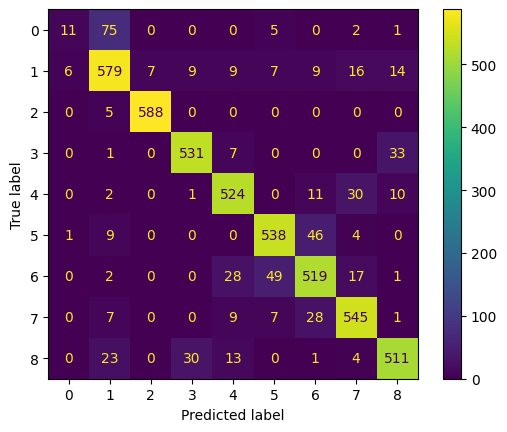

              precision    recall  f1-score   support

           0       0.61      0.12      0.20        94
           1       0.82      0.88      0.85       656
           2       0.99      0.99      0.99       593
           3       0.93      0.93      0.93       572
           4       0.89      0.91      0.90       578
           5       0.89      0.90      0.89       598
           6       0.85      0.84      0.84       616
           7       0.88      0.91      0.90       597
           8       0.89      0.88      0.89       582

    accuracy                           0.89      4886
   macro avg       0.86      0.82      0.82      4886
weighted avg       0.89      0.89      0.88      4886

training accuracy: 0.8755629942568942
testing accuracy: 0.8894801473598035


In [47]:
from sklearn.ensemble import RandomForestClassifier

rf=train_model(RandomForestClassifier(random_state=42),{})
report(rf)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
{'max_depth': 13, 'n_estimators': 90}


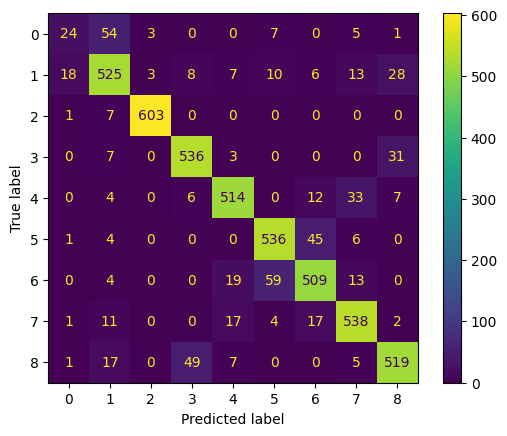

              precision    recall  f1-score   support

           0       0.52      0.26      0.34        94
           1       0.83      0.85      0.84       618
           2       0.99      0.99      0.99       611
           3       0.89      0.93      0.91       577
           4       0.91      0.89      0.90       576
           5       0.87      0.91      0.89       592
           6       0.86      0.84      0.85       604
           7       0.88      0.91      0.89       590
           8       0.88      0.87      0.88       598

    accuracy                           0.89      4860
   macro avg       0.85      0.83      0.83      4860
weighted avg       0.88      0.89      0.88      4860

training accuracy: 0.8809939278176818
testing accuracy: 0.8855967078189301


In [19]:
from xgboost import XGBClassifier


xgb=train_model(
    XGBClassifier(booster='gbtree',eval_metric='merror',seed=42,objective='multi:softprob'),
    {
        'max_depth':list(range(5,20)),
        # 'objective':['mutli:softprob','multi:softmax'],
        # 'n_estimators':list(range(50,100,10)),
        'learning_rate':[0.05,0.2,0.5,0.7,1]
    } 
)
report(xgb)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
{}


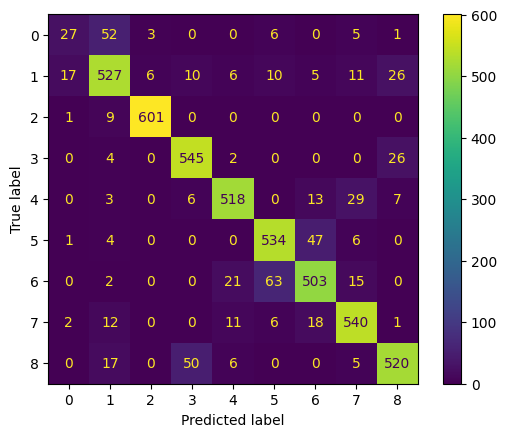

              precision    recall  f1-score   support

           0       0.56      0.29      0.38        94
           1       0.84      0.85      0.84       618
           2       0.99      0.98      0.98       611
           3       0.89      0.94      0.92       577
           4       0.92      0.90      0.91       576
           5       0.86      0.90      0.88       592
           6       0.86      0.83      0.85       604
           7       0.88      0.92      0.90       590
           8       0.90      0.87      0.88       598

    accuracy                           0.89      4860
   macro avg       0.85      0.83      0.84      4860
weighted avg       0.89      0.89      0.89      4860

training accuracy: 0.882331543095597
testing accuracy: 0.8878600823045267


In [29]:
from lightgbm import LGBMClassifier

lgbm=train_model(LGBMClassifier(verbose=0, seed=42, objective='multiclass'),{})
report(lgbm)

In [20]:
early_stopping1 = keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                               patience = 20, restore_best_weights = True)
early_stopping2 = keras.callbacks.EarlyStopping(monitor = "val_accuracy", 
                                               patience = 20, restore_best_weights = True)

model = keras.Sequential([
    keras.layers.Input(name = "input", shape = (xtrain.shape[1])),
    keras.layers.Dense(256, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(max(ytrain)+1, activation = "softmax")
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                      

In [21]:
model.compile(optimizer = keras.optimizers.Adam(),
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

model_history = model.fit(xtrain, ytrain,
                epochs = 500,
                verbose = 1, batch_size = 32,
                validation_data = (xtest, ytest),
                callbacks = [early_stopping1, early_stopping2])

Epoch 1/500


608/608 [==============================] - 12s 12ms/step - loss: 0.9197 - accuracy: 0.6763 - val_loss: 0.7258 - val_accuracy: 0.7276
Epoch 2/500
608/608 [==============================] - 7s 11ms/step - loss: 0.6654 - accuracy: 0.7654 - val_loss: 0.5173 - val_accuracy: 0.8181
Epoch 3/500
608/608 [==============================] - 7s 12ms/step - loss: 0.6140 - accuracy: 0.7836 - val_loss: 0.5106 - val_accuracy: 0.8187
Epoch 4/500
608/608 [==============================] - 8s 13ms/step - loss: 0.5899 - accuracy: 0.7893 - val_loss: 0.5144 - val_accuracy: 0.8212
Epoch 5/500
608/608 [==============================] - 7s 12ms/step - loss: 0.5911 - accuracy: 0.7895 - val_loss: 0.4820 - val_accuracy: 0.8251
Epoch 6/500
608/608 [==============================] - 8s 13ms/step - loss: 0.5711 - accuracy: 0.7958 - val_loss: 0.4985 - val_accuracy: 0.8195
Epoch 7/500
608/608 [==============================] - 7s 12ms/step - loss: 0.5587 - accuracy: 0.8013 - val_loss: 0.5037 - val_accura

In [22]:
print(model.evaluate(xtrain, ytrain))
print(model.evaluate(xtest, ytest))


608/608 [==============================] - 1s 2ms/step - loss: 0.3049 - accuracy: 0.8877
[0.3048620820045471, 0.8877341151237488]
152/152 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8582
[0.40689706802368164, 0.858230471611023]


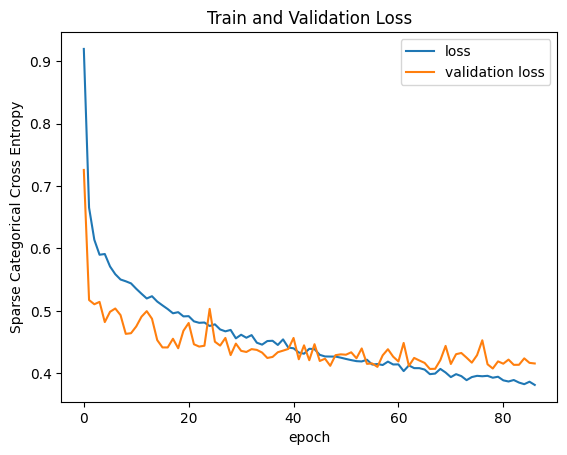

In [23]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.legend(["loss", "validation loss"], loc ="upper right")
plt.title("Train and Validation Loss")
plt.xlabel("epoch")
plt.ylabel("Sparse Categorical Cross Entropy")
plt.show()

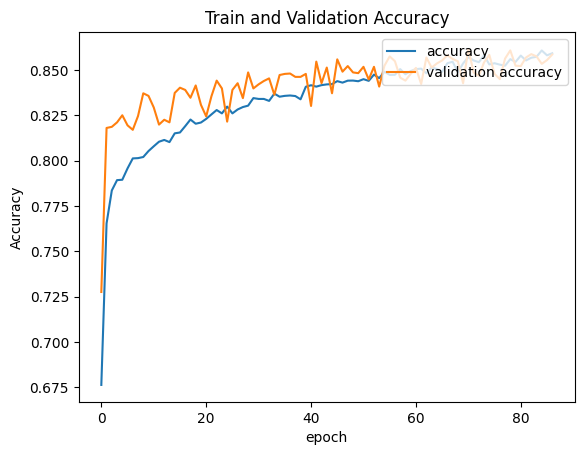

In [24]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.legend(["accuracy", "validation accuracy"], loc ="upper right")
plt.title("Train and Validation Accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.show()

In [25]:
ypred = model.predict(xtest).argmax(axis=1)

152/152 [==============================] - 0s 2ms/step


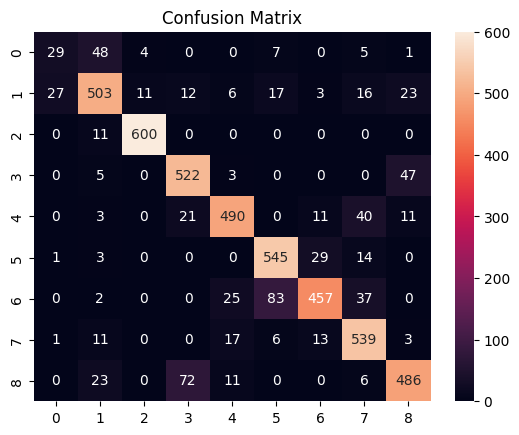

In [26]:
cf_matrix = metrics.confusion_matrix(ytest, ypred)
_ = sns.heatmap(cf_matrix, fmt=".0f", annot=True)
_ = plt.title("Confusion Matrix")

In [27]:
print(metrics.classification_report(le.inverse_transform(ytest), le.inverse_transform(ypred)))

              precision    recall  f1-score   support

         Pop       0.50      0.31      0.38        94
         Rap       0.83      0.81      0.82       618
         dnb       0.98      0.98      0.98       611
   hardstyle       0.83      0.90      0.87       577
   psytrance       0.89      0.85      0.87       576
   techhouse       0.83      0.92      0.87       592
      techno       0.89      0.76      0.82       604
      trance       0.82      0.91      0.86       590
        trap       0.85      0.81      0.83       598

    accuracy                           0.86      4860
   macro avg       0.82      0.81      0.81      4860
weighted avg       0.86      0.86      0.86      4860



In [28]:
print(metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.50      0.31      0.38        94
           1       0.83      0.81      0.82       618
           2       0.98      0.98      0.98       611
           3       0.83      0.90      0.87       577
           4       0.89      0.85      0.87       576
           5       0.83      0.92      0.87       592
           6       0.89      0.76      0.82       604
           7       0.82      0.91      0.86       590
           8       0.85      0.81      0.83       598

    accuracy                           0.86      4860
   macro avg       0.82      0.81      0.81      4860
weighted avg       0.86      0.86      0.86      4860



In [30]:
xgbPreds=xgb.predict(tempX)
xgbPreds

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [31]:
lgbmPreds=lgbm.predict(tempX)
lgbmPreds

array([0, 1, 1, ..., 1, 1, 1])

In [32]:
modelPreds=model.predict(tempX).argmax(axis=1)
modelPreds

1654/1654 [==============================] - 3s 2ms/step


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [33]:
df2['xgbPreds']=xgbPreds
df2['lgbmPreds']=lgbmPreds
df2['modelPreds']=modelPreds


In [ ]:
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(xgb,open('xgb.pkl','wb'))
pickle.dump(lgbm,open('lgbm.pkl','wb'))

In [36]:
df2.to_csv('new_audio_features.csv',index=False)